In [5]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parcial III - Métodos Computacionales

### Nombre:

---

## ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


---

# 1

(**35 puntos**) El **método de Jacobi** es un algoritmo iterativo para resolver sistemas lineales de la forma:

$$
A \mathbf{x} = \mathbf{b},
$$

donde \$A\$ es una matriz cuadrada no singular. A diferencia del método de Gauss-Seidel, Jacobi utiliza exclusivamente los valores de la iteración anterior para actualizar todas las variables simultáneamente, lo que lo hace más sencillo de paralelizar pero, en general, con una convergencia más lenta.

## Algoritmo

Dado un sistema lineal \$A \mathbf{x} = \mathbf{b}\$, el método de Jacobi consiste en:

1. Elegir un vector inicial \$\mathbf{x}^{(0)}\$ (por ejemplo, el vector nulo).

2. Para cada iteración \$k\$ y cada componente \$i = 1, 2, ..., n\$, actualizar:

$$
x_i^{(k)} = \frac{1}{a_{ii}} \left( b_i - \sum_{\substack{j=1 \\ j \neq i}}^{n} a_{ij} x_j^{(k-1)} \right)
$$

3. Repetir hasta que se cumpla un criterio de convergencia, como:

$$
\| \mathbf{x}^{(k)} - \mathbf{x}^{(k-1)} \| < \text{tolerancia}
$$

---

**a)** Escriba una función llamada `jacobi` que resuelva el sistema lineal \$A \mathbf{x} = \mathbf{b}\$ usando el método iterativo de Jacobi. La función debe aceptar como argumentos:

* La matriz \$A\$ y el vector \$\mathbf{b}\$,
* Una tolerancia (por defecto \$1\times 10^{-10}\$),
* Un número máximo de iteraciones.

Debe retornar la solución aproximada \$\mathbf{x}\$ y el número de iteraciones realizadas.

---

**b)** Aplique su función para resolver el siguiente sistema de ecuaciones lineales:

$$
\begin{cases}
10x_1 - x_2 + 2x_3 = 6 \\[2mm]
-2x_1 + 11x_2 - x_4 = 25 \\[2mm]
3x_1 - x_2 + 10x_3 - x_4 = -11 \\[2mm]
2x_2 - x_3 + 8x_4 = 15
\end{cases}
$$

Use como vector inicial \$\mathbf{x}^{(0)} = \[0, 0, 0, 0]^T\$. Imprima la solución aproximada y el número de iteraciones necesarias para adquirir la convergencia.

---

**c)** Compare su solución con `np.linalg.solve`. ¿Qué tan cercana es la solución iterativa a la exacta? Para esto, realice un gráfico del error usando la norma euclidiana (`np.linalg.norm`) en función de la tolerancia y otro del número de iteraciones, empleando un `np.logspace(-18, -1, 18)`.

---



In [46]:
# Inciso a
def jacobi(A , b , tol = 1e-10 , max_iter = 100):
  '''
  Entradas:
  - A : matris -> array
  - b : vector de constantes -> array
  - tol : tolerancia
  - max_iter : maximas iteraciones

  '''

  n = len(b)
  x = np.zeros_like(b, dtype = float)
  x_new = np.zeros_like(x)

  iter = 0
  convergencia = False

  while iter <= max_iter and not convergencia:
    for i in range(n):
      suma = 0.0

      for j in range(n):
        if j != i:
          suma += A[i, j] * x[j]
      x_new[i] = (b[i] - suma) / A[i, i]

    error = np.linalg.norm(x_new - x, ord=np.inf)
    if error < tol:
      convergencia = True
    else:
      x[:] = x_new
      iter += 1

  return x_new , iter

In [48]:
# Inciso b)
A = np.array([[10 , -1 , 2 , 0],
              [-2 , 11 , 0 , -1],
              [3 , -1 , 10 , -1],
              [0 , 2 , -1 , 8]])

b = np.array([6 , 25 , -11 , 15])

x , iter = jacobi(A , b)
print('Vector solucion:', x)
print('Iteraciones', iter)

Vector solucion: [ 1.06736509  2.56693873 -1.05335607  1.10159581]
Iteraciones 20


In [ ]:
# Inciso c)

# 2

(**50 puntos**) El sistema **masa-resorte con fricción** es un modelo clásico en física que describe el movimiento de una masa sujeta a una fuerza restauradora (resorte) y una fuerza disipativa (fricción o viscosidad). Su dinámica está gobernada por la ecuación diferencial de segundo orden:

$$
m y''(t) + c y'(t) + k y(t) = 0,
$$

donde:

* $m$ es la masa del objeto,
* $c$ es el coeficiente de fricción (amortiguamiento),
* $k$ es la constante del resorte,
* $y(t)$ es la posición de la masa respecto a su equilibrio.

---

**a)** Reformule esta ecuación como un sistema de primer orden adecuado para ser resuelto con `solve_ivp`. Explique mediante una función explicita y realice su documentación.

---

**b)** Considere el siguiente caso:

* Masa: $m = 1$ kg
* Constante del resorte: $k = 4$ N/m
* Coeficiente de fricción: $c = 0.5$ N·s/m
* Condiciones iniciales: $y(0) = 1$, $y'(0) = 0$
* Intervalo de tiempo: $t \in [0, 20]$

Utilice `solve_ivp` para resolver el sistema y grafique $y(t)$ como $y'(t)$. Interprete el comportamiento del sistema.

---

**c)** Simule dos escenarios adicionales:

1. Sin fricción: $c = 0$
2. Con fuerte fricción: $c = 4.5$

Grafique los tres casos \$y(t)\$ en una misma figura y compare los regímenes: **no amortiguado**, **subamortiguado**, y **sobreamortiguado**.

---

**d)** Para cada uno de los tres casos, calcule la **energía mecánica total** del sistema en función del tiempo. La energía total se define como la suma de energía cinética y potencial:

$$
E(t) = \frac{1}{2} m v^2 + \frac{1}{2} k y^2
$$

Grafique $E(t)$ para los tres escenarios simulados. Analice y compare el comportamiento de la energía en cada caso. ¿Qué sucede con la energía a lo largo del tiempo? ¿Cómo se relaciona esto con el valor del coeficiente de fricción $c$?


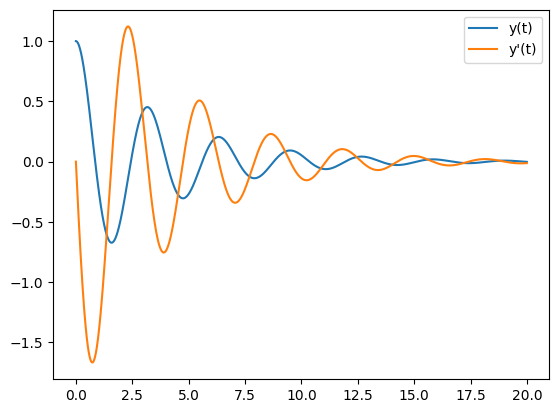

In [15]:
# Incso a): Planteamiento del sistema EDO de primer orden
def EDO(t , Y):
  '''
  Sstema EDO planteado:
  y = Y1
  y' = Y2
  y'' = - cY2 - kY1

  Entradas:
  - t : variable independiente
  - Y: (y , y') = (Y1 , Y2)

  Return:
  - (dY1 , dY2) -> array
  '''

  Y1 , Y2 = Y
  dY1 = Y2
  dY2 = -c*Y2 - k*Y1

  return np.array([dY1 , dY2])

# Inciso b): Solucion
# Datos para el inciso b)
m = 1 # kg
k = 4 #N/m
c = 0.5 #N s/m

y0 , dy0 = 1, 0 # Condicones inciales

t_span = (0 , 20)
h = 0.01
t = np.arange(0 , 20, h)

sol_b = solve_ivp(EDO , t_span , [y0 , dy0] , method='RK45' , t_eval=t)

# Graficar la solución
plt.plot(sol_b.t, sol_b.y[0], label='y(t)')
plt.plot(sol_b.t, sol_b.y[1], label="y'(t)")
plt.legend()
plt.show()

# Se puede aprecar como a lo largo del tiempo, la velocidad y posicion corvengen a 0,
# esto se puede interpretar como si las oscilacones a lo largo del tempo se detienen

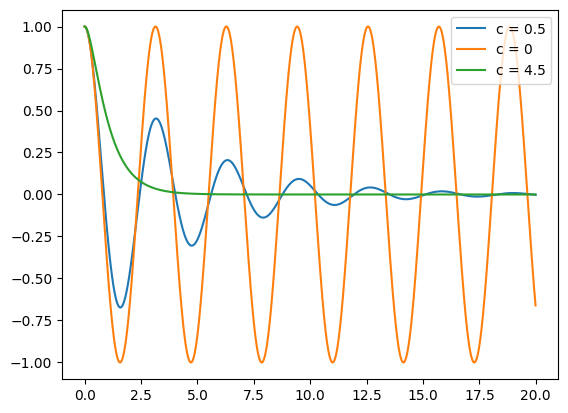

In [16]:
# Inciso c)
# Para c = 0
c = 0
sol_c0 = solve_ivp(EDO , t_span , [y0 , dy0] , method='RK45' , t_eval=t)

# Para c = 4.5
c = 4.5
sol_c4 = solve_ivp(EDO , t_span , [y0 , dy0] , method='RK45' , t_eval=t)

# Graficar la solución
plt.plot(sol_b.t, sol_b.y[0], label='c = 0.5')
plt.plot(sol_c0.t, sol_c0.y[0], label='c = 0')
plt.plot(sol_c4.t, sol_c4.y[0], label='c = 4.5')
plt.legend()
plt.show()

# Se puede apreciar como a mayor coeficeinte de fricion el movimiento osilatoro disminuye en mayor medida

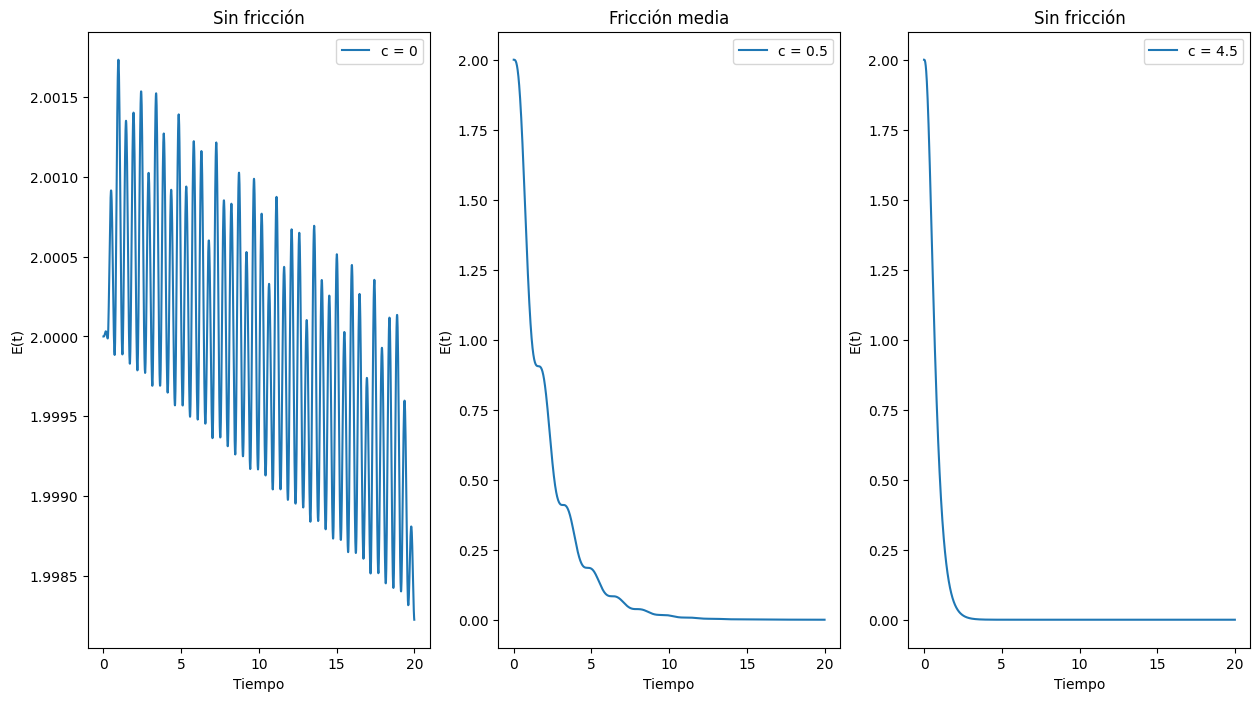

In [29]:
# Inciso d:
E = lambda v , y : (m * v**2 + k * y**2)/2 # Ecuacion de la energa mecanica total

fig, ax = plt.subplots(1, 3, figsize=(15, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.2)

# Sin fricion
ax[0].set_title('Sin fricción')

ax[0].plot(sol_c0.t , E(sol_c0.y[1] , sol_c0.y[0]), label='c = 0')

ax[0].set_xlabel('Tiempo')
ax[0].set_ylabel('E(t)')

ax[0].legend()

# Frcion media
ax[1].set_title('Fricción media')

ax[1].plot(sol_b.t , E(sol_b.y[1] , sol_b.y[0]), label='c = 0.5')

ax[1].set_xlabel('Tiempo')
ax[1].set_ylabel('E(t)')

ax[1].legend()

# Friccion alta
ax[2].set_title('Sin fricción')

ax[2].plot(sol_c4.t , E(sol_c4.y[1] , sol_c4.y[0]), label='c = 4.5')

ax[2].set_xlabel('Tiempo')
ax[2].set_ylabel('E(t)')

ax[2].legend()

plt.show()

# 3

**(15 puntos)** Sea $A$ una matriz cuadrada de tamaño $n \times n$. Dos propiedades fundamentales de los autovalores de $A$ son:

1. **Determinante**:

   $$
   \det(A) = \prod_{i=1}^{n} \lambda_i
   $$

2. **Traza**:

   $$
   \mathrm{tr}(A) = \sum_{i=1}^{n} \lambda_i
   $$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando un conjunto de matrices aleatorias $A$ de $5\times 5$ (1000 matrices diferentes), verifique numéricamente ambas propiedades. Puede emplear las funciones `np.linalg.det`, `np.trace` y `np.linalg.eigvals`.


In [ ]:
# Aquí va su código